In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

# Disulfide Bond

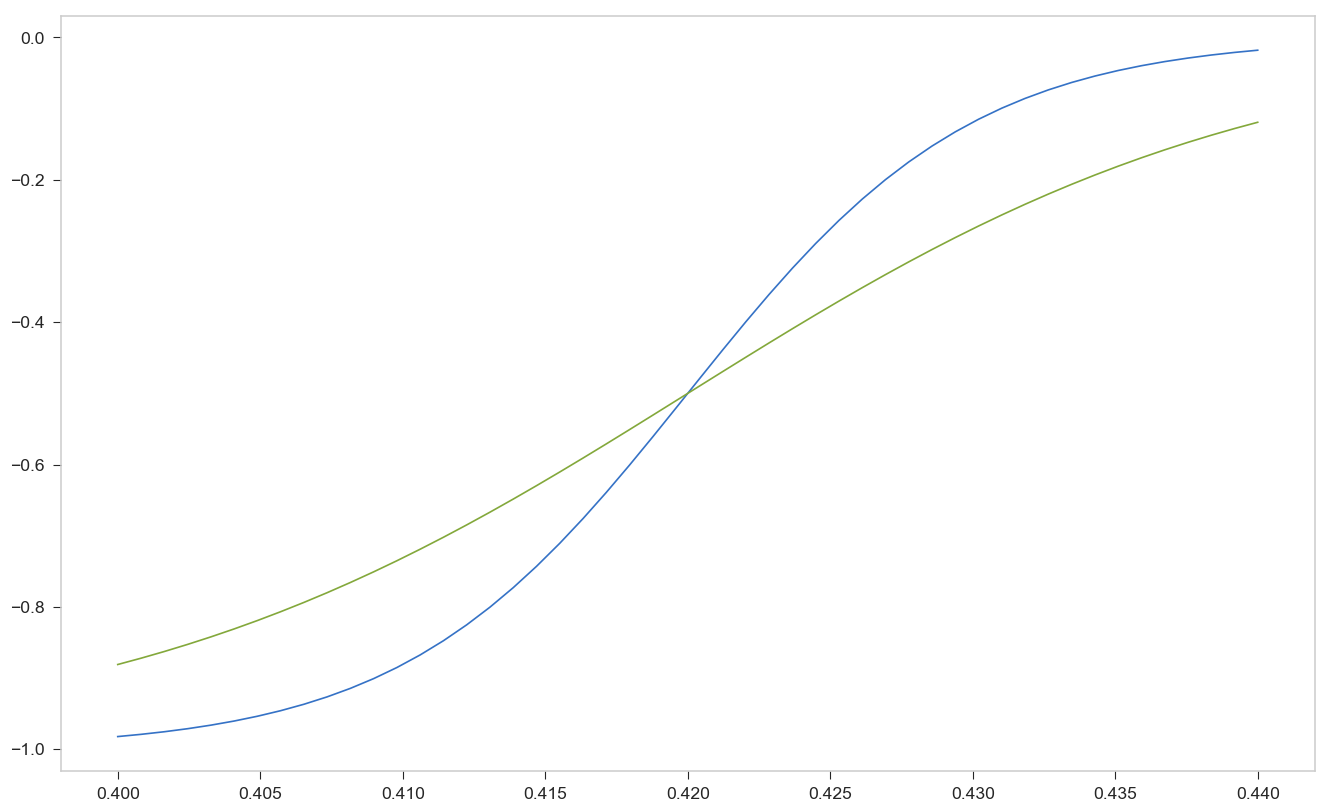

In [5]:
k_bin = 100
r = np.linspace(0.4,0.44)
cutoff = 0.42
y = 0.5*(np.tanh(k_bin*(r-cutoff))-1)
plt.plot(r, y)
k_bin = 50
y = 0.5*(np.tanh(k_bin*(r-cutoff))-1)
plt.plot(r, y)

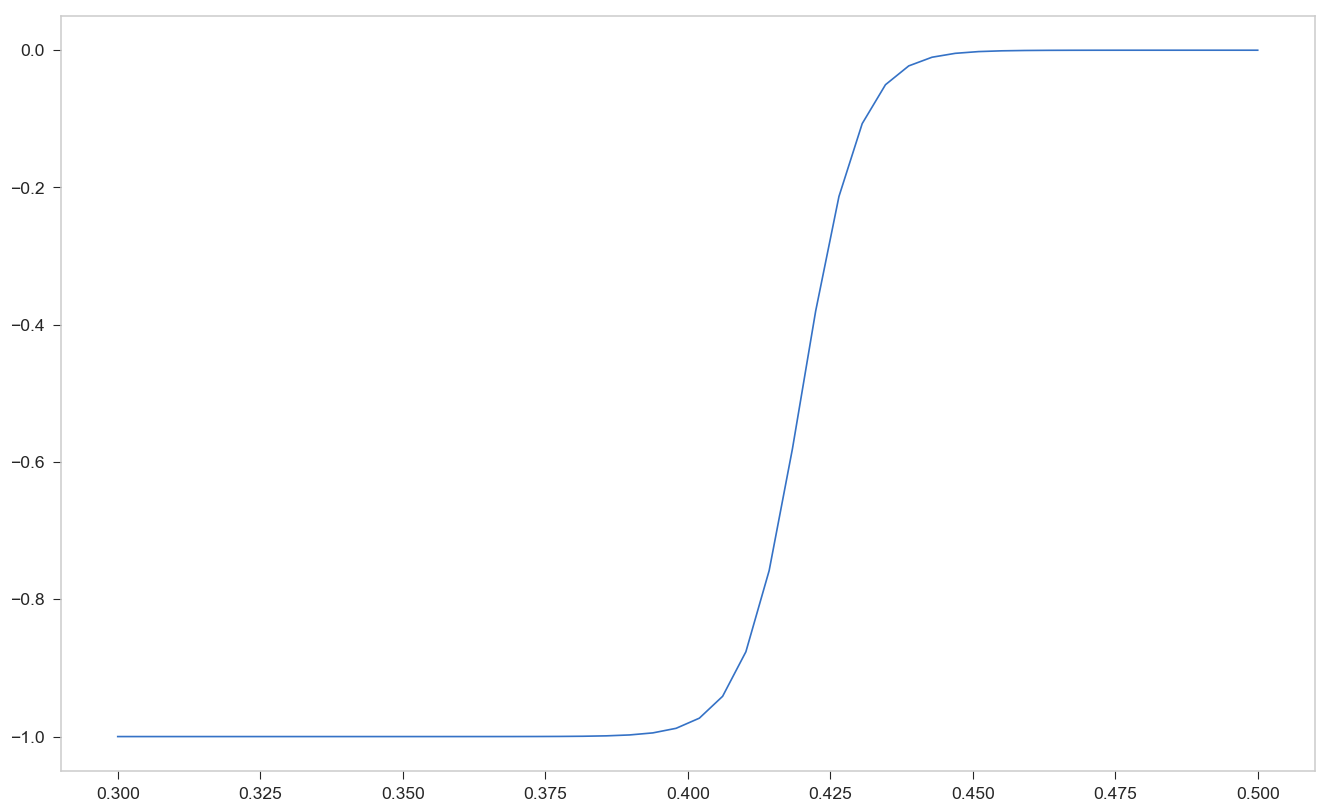

In [21]:
k_bin = 100
r = np.linspace(0.3,0.5)
cutoff = 0.42
y = 0.5*(np.tanh(k_bin*(r-cutoff))-1)
plt.plot(r, y)

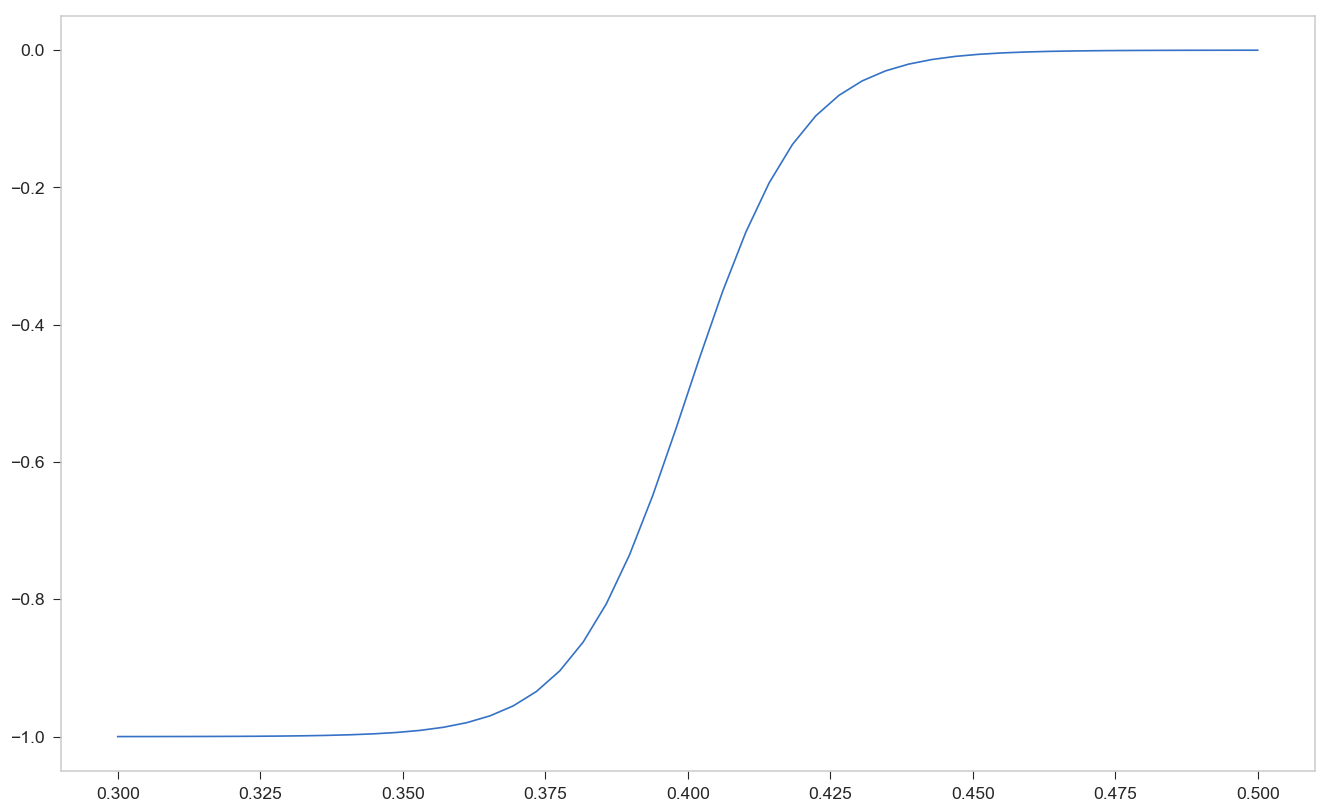

In [24]:
k_bin = 50
r = np.linspace(0.3,0.5)
cutoff = 0.4
y = 0.5*(np.tanh(k_bin*(r-cutoff))-1)
plt.plot(r, y)

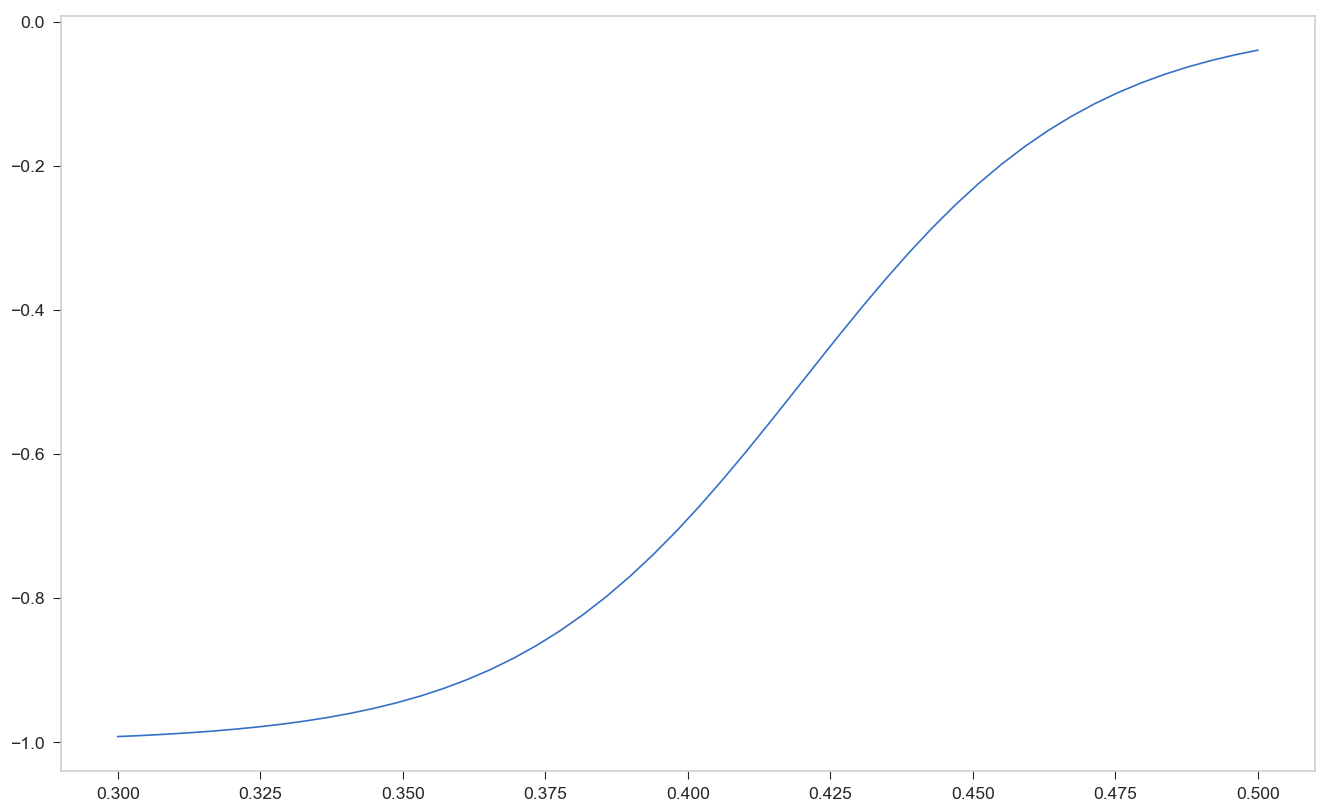

In [3]:
k_bin = 20
r = np.linspace(0.3,0.5)
cutoff = 0.42
y = 0.5*(np.tanh(k_bin*(r-cutoff))-1)
plt.plot(r, y)

In [6]:
k_bin = 0.1
dz = np.linspace(-50,50)
memb_b = 15

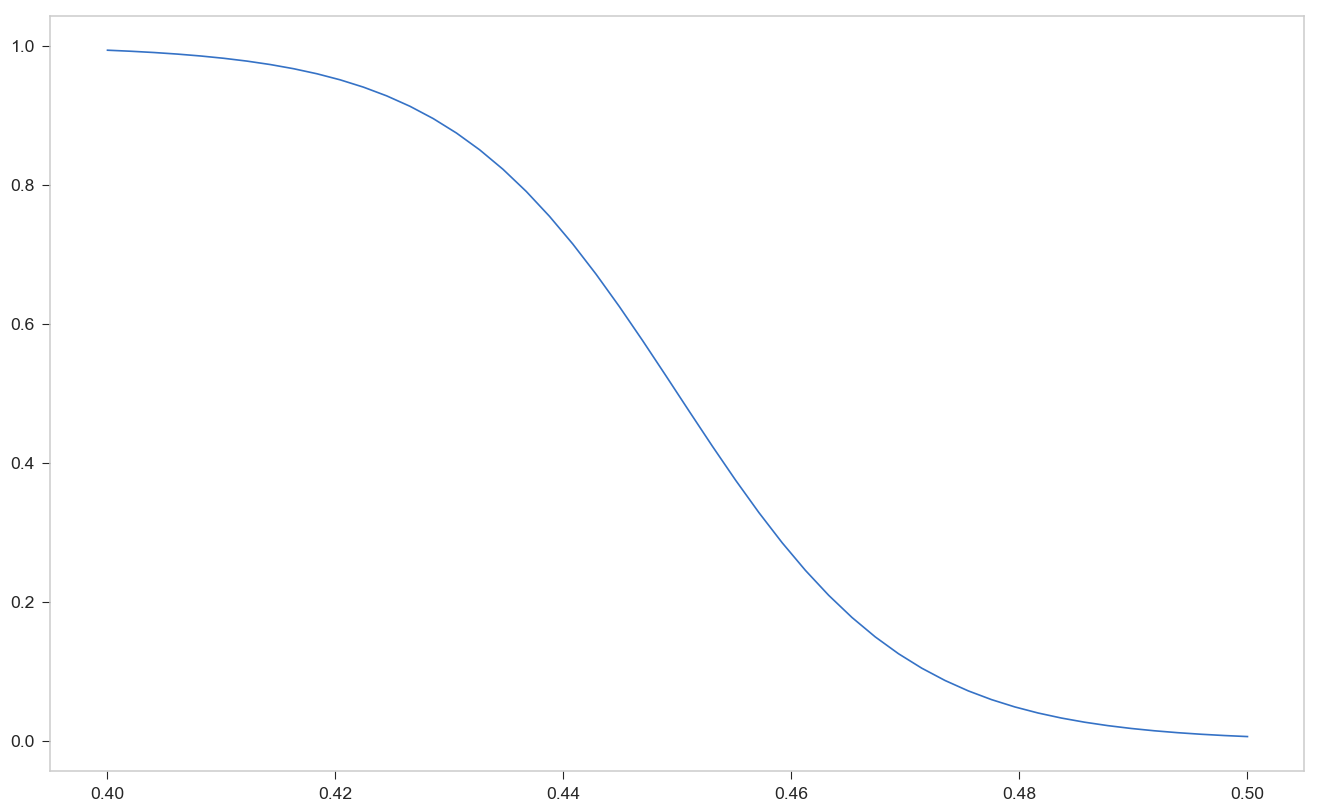

In [36]:
r_min = .3
r_max = .45
eta = 50  # eta actually has unit of nm^-1.
r = np.linspace(0.2 ,0.8)
r = np.linspace(0.3 ,0.4)
r = np.linspace(0.4 ,0.5)
y = 0.25*(1+np.tanh(eta*(r-r_min)))*(1+np.tanh(eta*(r_max-r)))
plt.plot(r, y)

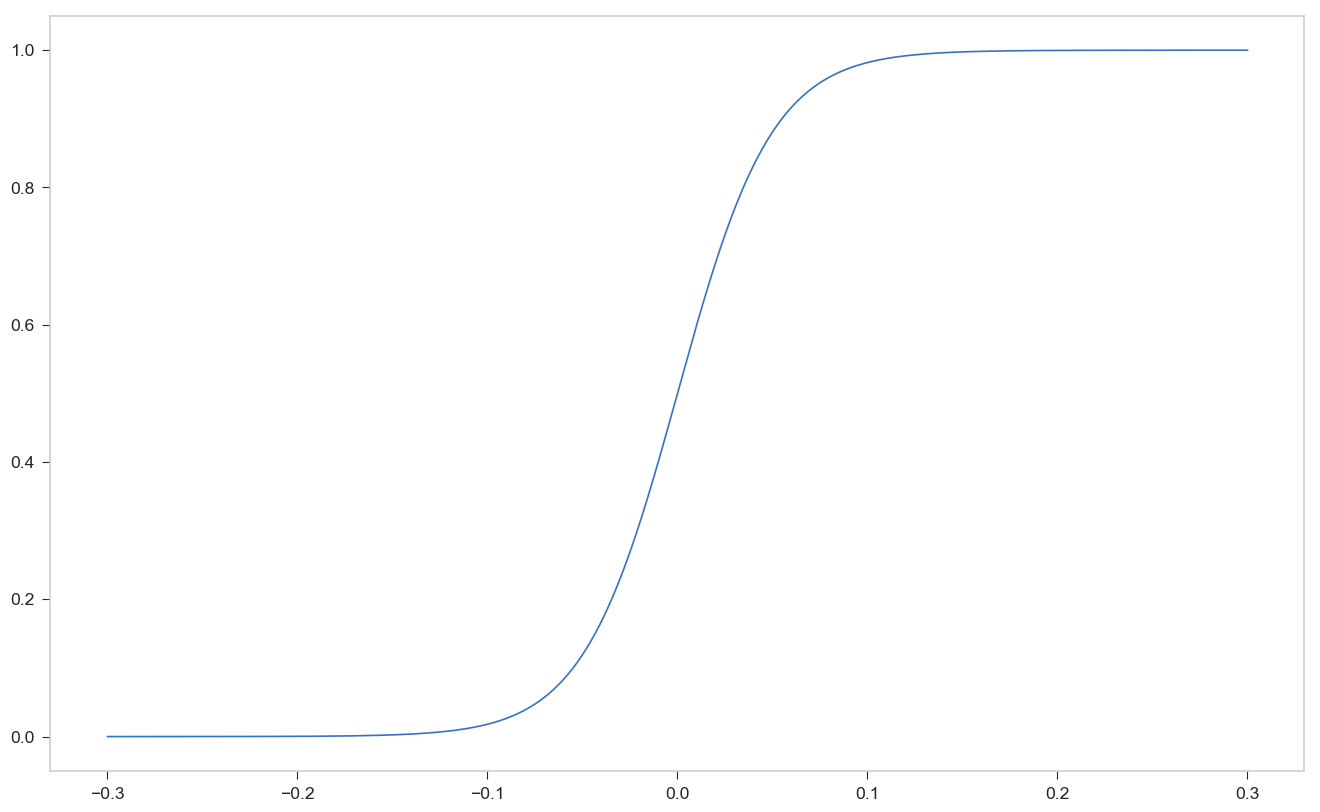

In [47]:
r_min = .3
r_max = .45
eta = 20  # eta actually has unit of rho^-1.
r = np.linspace(-1 ,1, num=1000)
r = np.linspace(-0.3 ,0.3, num=1000)
y = 0.5*(np.tanh(eta*(r)) + 1)
plt.plot(r, y)

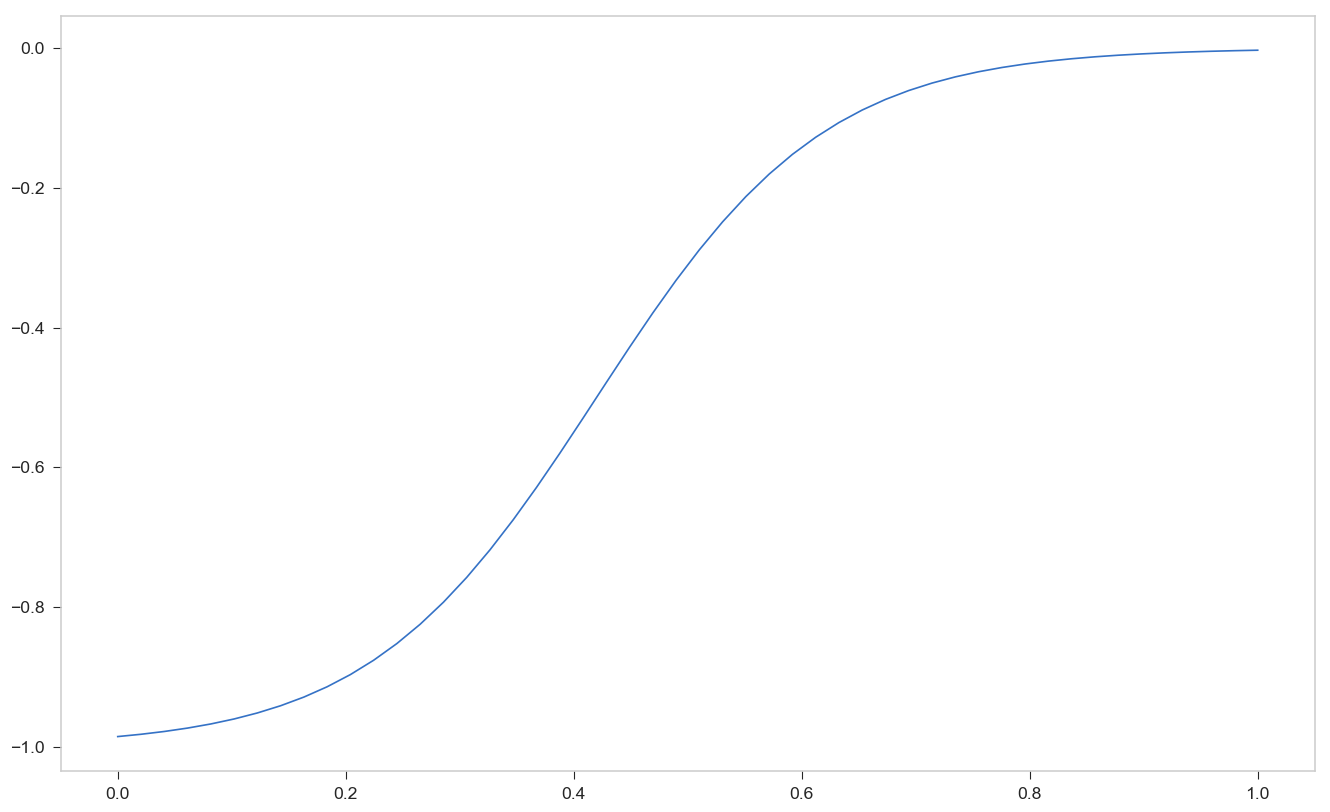

In [78]:
k_bin = 5
r = np.linspace(0.3,0.5)
r = np.linspace(0,1)
cutoff = 0.42
y = 0.5*(np.tanh(k_bin*(r-cutoff))-1)
plt.plot(r, y)

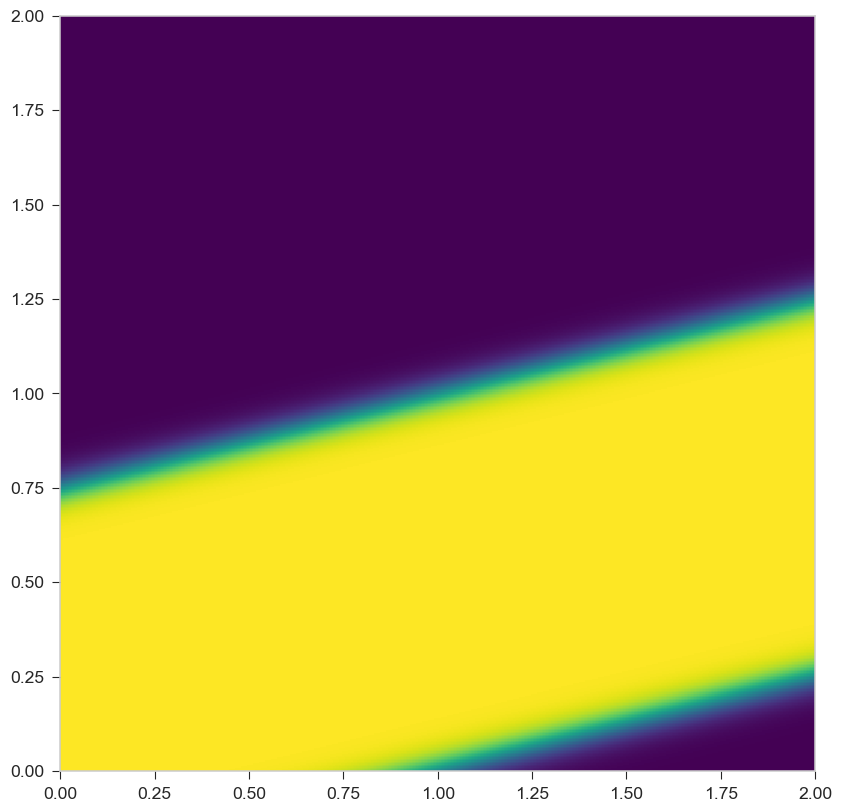

In [7]:
# I want two D, heat map.
tanh = np.tanh
step_k_bin = 20
rho1 = np.linspace(0.25, 0.75, 500)
rho2 = np.linspace(0, 2, 500).reshape(-1, 1)
stepNear=0.5*(tanh(step_k_bin*(0.5-abs(rho1-rho2)))+1)
stepSmall=0.5*(tanh(step_k_bin*(2.5-rho1-rho2))+1)
z = stepNear * stepSmall
plt.imshow(z, origin="lower", extent=[0,2,0,2])

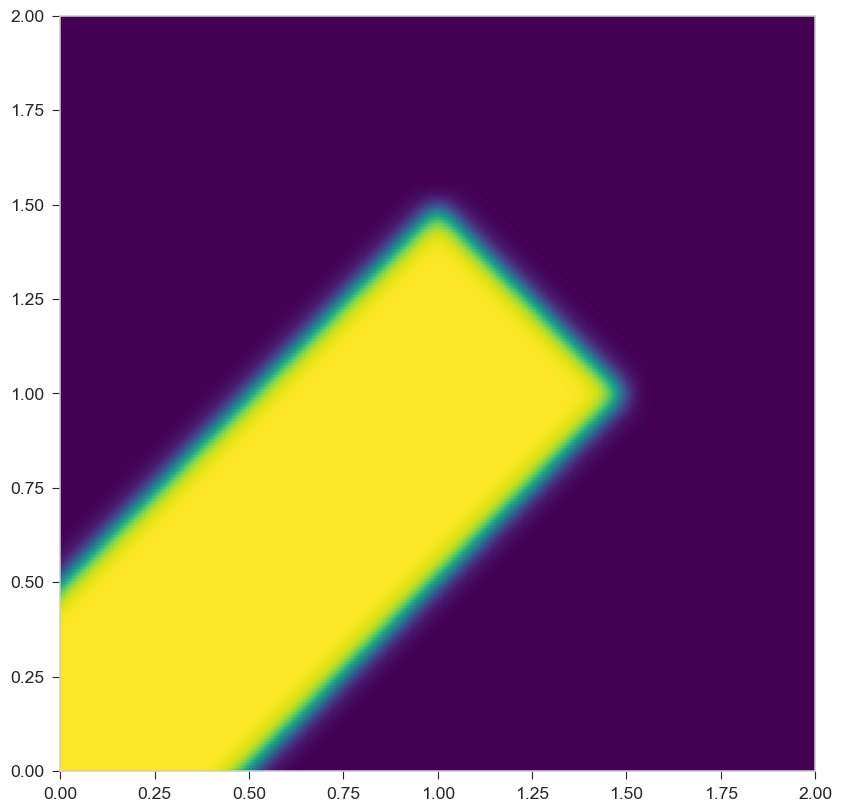

In [69]:
# I want two D, heat map.
tanh = np.tanh
step_k_bin = 20
rho1 = np.linspace(0, 2, 500)
rho2 = np.linspace(0, 2, 500).reshape(-1, 1)
stepNear=0.5*(tanh(step_k_bin*(0.5-abs(rho1-rho2)))+1)
stepSmall=0.5*(tanh(step_k_bin*(2.5-rho1-rho2))+1)
z = stepNear * stepSmall
plt.imshow(z, origin="lower", extent=[0,2,0,2])

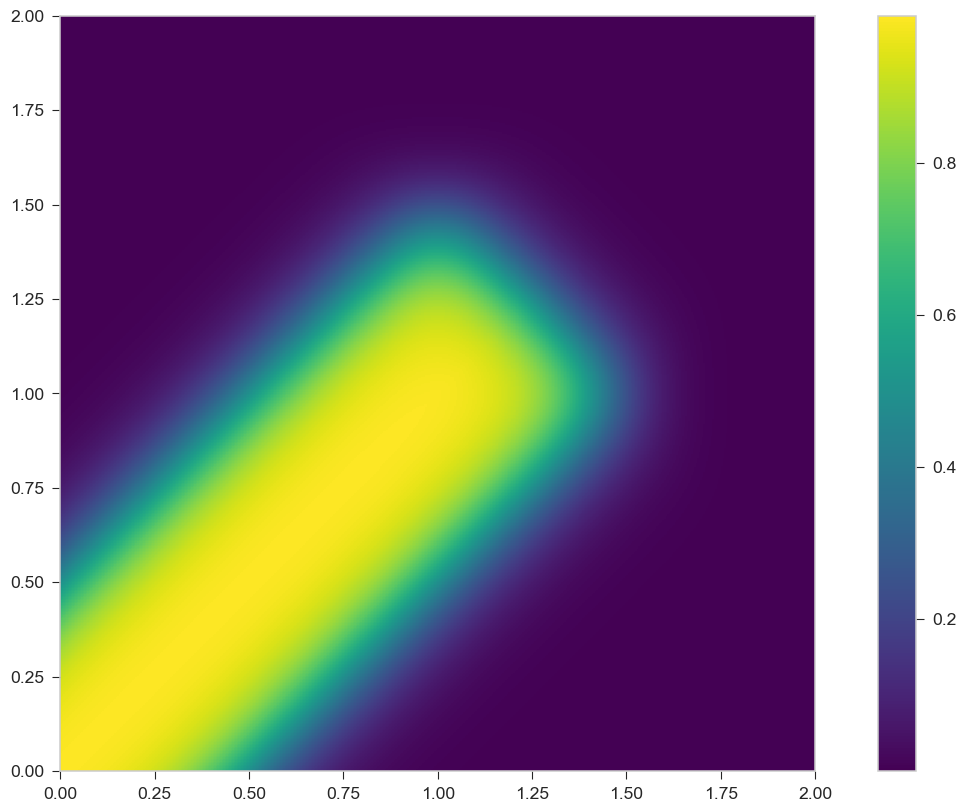

In [77]:
# I want two D, heat map.
tanh = np.tanh
step_k_bin = 5
rho1 = np.linspace(0, 2, 500)
rho2 = np.linspace(0, 2, 500).reshape(-1, 1)
stepNear=0.5*(tanh(step_k_bin*(0.5-abs(rho1-rho2)))+1)
stepSmall=0.5*(tanh(step_k_bin*(2.5-rho1-rho2))+1)
z = stepNear * stepSmall
plt.imshow(z, origin="lower", extent=[0,2,0,2])
plt.colorbar()

In [22]:
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

Text(0.5, 1.0, '$\\theta_{small}$')

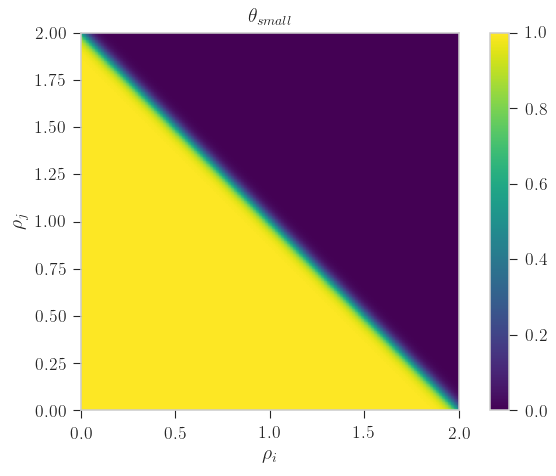

In [28]:
# I want two D, heat map.
tanh = np.tanh
step_k_bin = 20
rho1 = np.linspace(0, 2, 500)
rho2 = np.linspace(0, 2, 500).reshape(-1, 1)
stepNear=0.5*(tanh(step_k_bin*(0.5-abs(rho1-rho2)))+1)
stepSmall=0.5*(tanh(step_k_bin*(2-rho1-rho2))+1)
# z = stepNear * stepSmall
# z = stepNear
z = stepSmall
plt.imshow(z, origin="lower", extent=[0,2,0,2])
plt.colorbar()
# plt.ylabel("rho_j")
plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.ylabel(r'$\rho_j$')
plt.xlabel(r'$\rho_i$')
plt.title(r"$\theta_{small}$")

Text(0.5, 1.0, '$\\theta_{near}$')

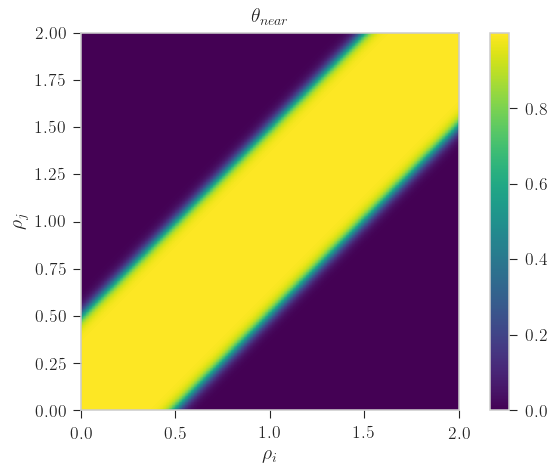

In [29]:
# I want two D, heat map.
tanh = np.tanh
step_k_bin = 20
rho1 = np.linspace(0, 2, 500)
rho2 = np.linspace(0, 2, 500).reshape(-1, 1)
stepNear=0.5*(tanh(step_k_bin*(0.5-abs(rho1-rho2)))+1)
stepSmall=0.5*(tanh(step_k_bin*(2-rho1-rho2))+1)
# z = stepNear * stepSmall
z = stepNear
# z = stepSmall
plt.imshow(z, origin="lower", extent=[0,2,0,2])
plt.colorbar()
# plt.ylabel("rho_j")
plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.ylabel(r'$\rho_j$')
plt.xlabel(r'$\rho_i$')
plt.title(r"$\theta_{near}$")

Text(0.5, 1.0, '$\\theta_{near} \\theta_{small}$')

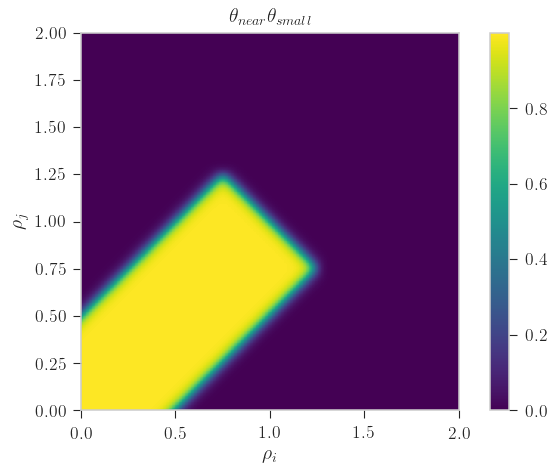

In [30]:
# I want two D, heat map.
tanh = np.tanh
step_k_bin = 20
rho1 = np.linspace(0, 2, 500)
rho2 = np.linspace(0, 2, 500).reshape(-1, 1)
stepNear=0.5*(tanh(step_k_bin*(0.5-abs(rho1-rho2)))+1)
stepSmall=0.5*(tanh(step_k_bin*(2-rho1-rho2))+1)
z = stepNear * stepSmall
# z = stepNear
# z = stepSmall
plt.imshow(z, origin="lower", extent=[0,2,0,2])
plt.colorbar()
# plt.ylabel("rho_j")
plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.ylabel(r'$\rho_j$')
plt.xlabel(r'$\rho_i$')
plt.title(r"$\theta_{near} \theta_{small}$")

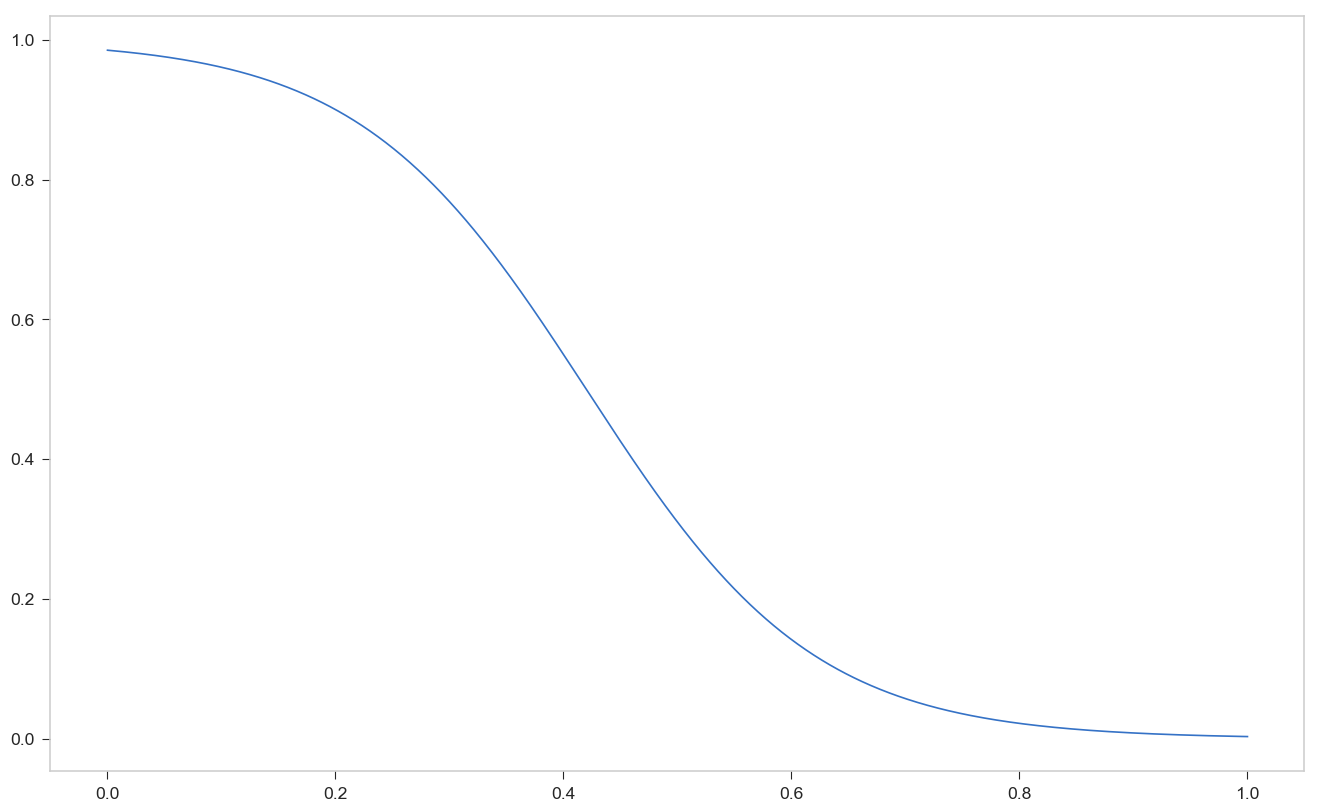

In [86]:
r_min = .3
r_max = .45
cutoff = 0.42
eta = 5  # eta actually has unit of rho^-1.
r = np.linspace(-1 ,1, num=1000)
r = np.linspace(0, 1, num=1000)
y = 0.5*(-np.tanh(eta*(r-cutoff)) + 1)
plt.plot(r, y)

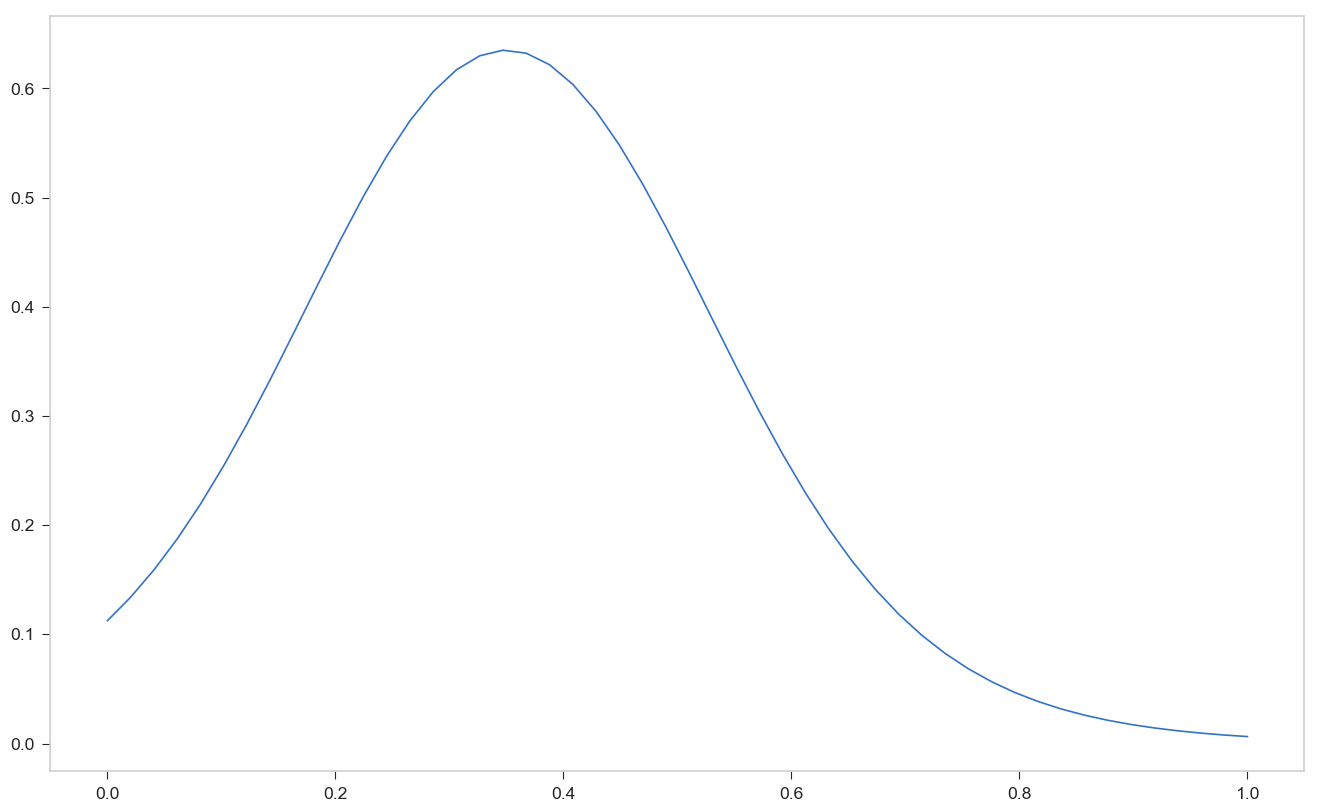

In [79]:
k_bin = 5
r_min = 0.2
r_max = 0.5
r = np.linspace(0.3,0.5)
r = np.linspace(0,1)
cutoff = 0.42
y = 0.5*((np.tanh(k_bin*(r-r_min)))+(np.tanh(k_bin*(r_max-r))))
plt.plot(r, y)

In [87]:
with open("/Users/weilu/Research/server/jul_2019/two_chains/TM_pred/4rws_topo") as f:
    a = f.readlines()

In [92]:
i = 0
all_chain = []
all_seq = []
all_pred = []
while i < len(a):
    assert a[i][0] == ">"
    chainName = a[i].strip()
    seq = a[i+1].strip()
    pred = a[i+2].strip()
    all_chain.append(chainName)
    all_seq.append(seq)
    all_pred.append(pred)
    i = i + 3


In [97]:
len(a)

6

In [93]:
all_chain

['>CRYSTAL_STRUCTURE:A', '>CRYSTAL_STRUCTURE:B']

In [94]:
all_seq

['SMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVWILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICCRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSGHQKRKALKPTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYA',
 'LGASCHRPDKCCLGYQKRPLPQVLLSSWYPTSQLCSKPGVIFLTKRGRQVCADKSKDWVKKLMQQLPVTA']

In [95]:
all_pred

['000000000000000001111111111111111111111111000000000001111111111111111111110000000000011111111111111111111111110000000000000000011111111111111111110000000000000000000000001111111111111111111111111110000000000000000011111111111111111111111100000000000000000001111111111000000000',
 '0000000000000000000000000000000000000000000000000000000000000000000000']

# s_periplasm

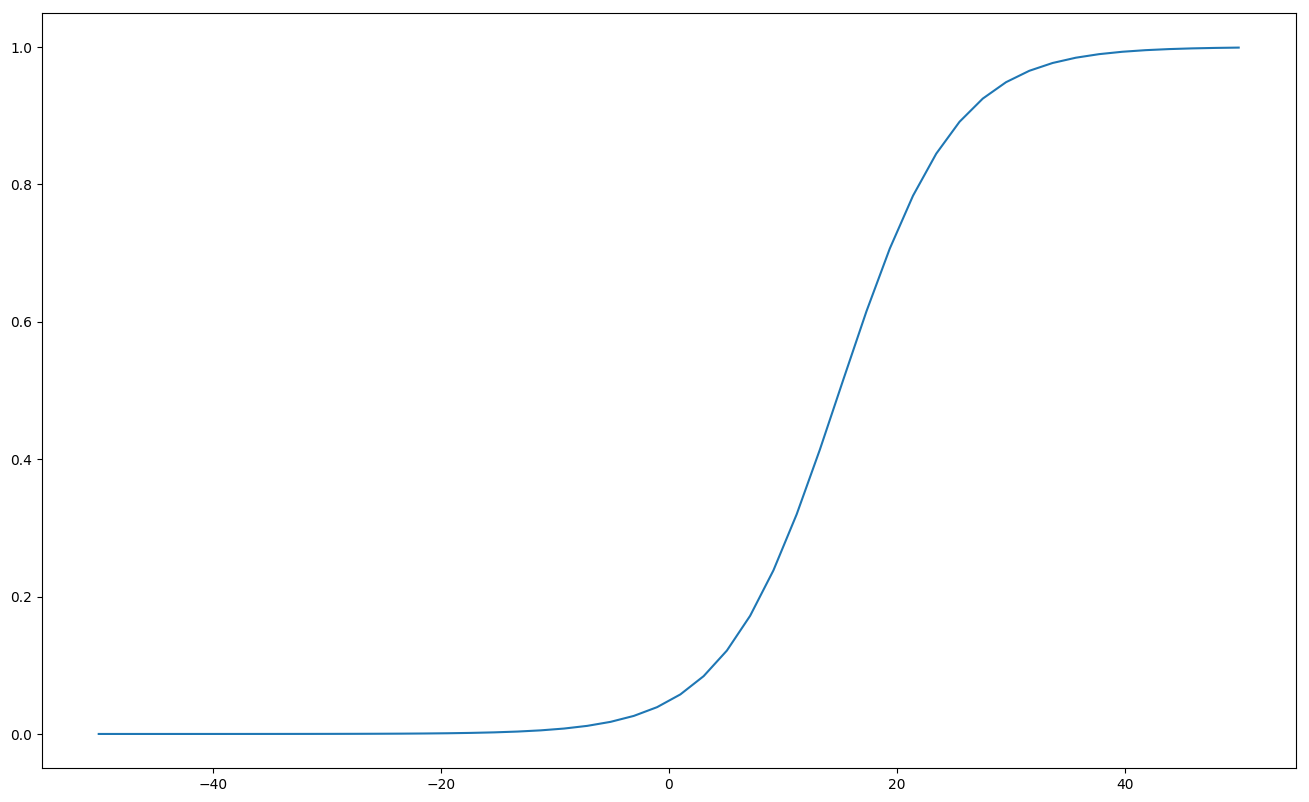

In [4]:
y = 0.5*(1+np.tanh(k_bin*(dz-memb_b)))
plt.plot(dz, y)

# Membrane

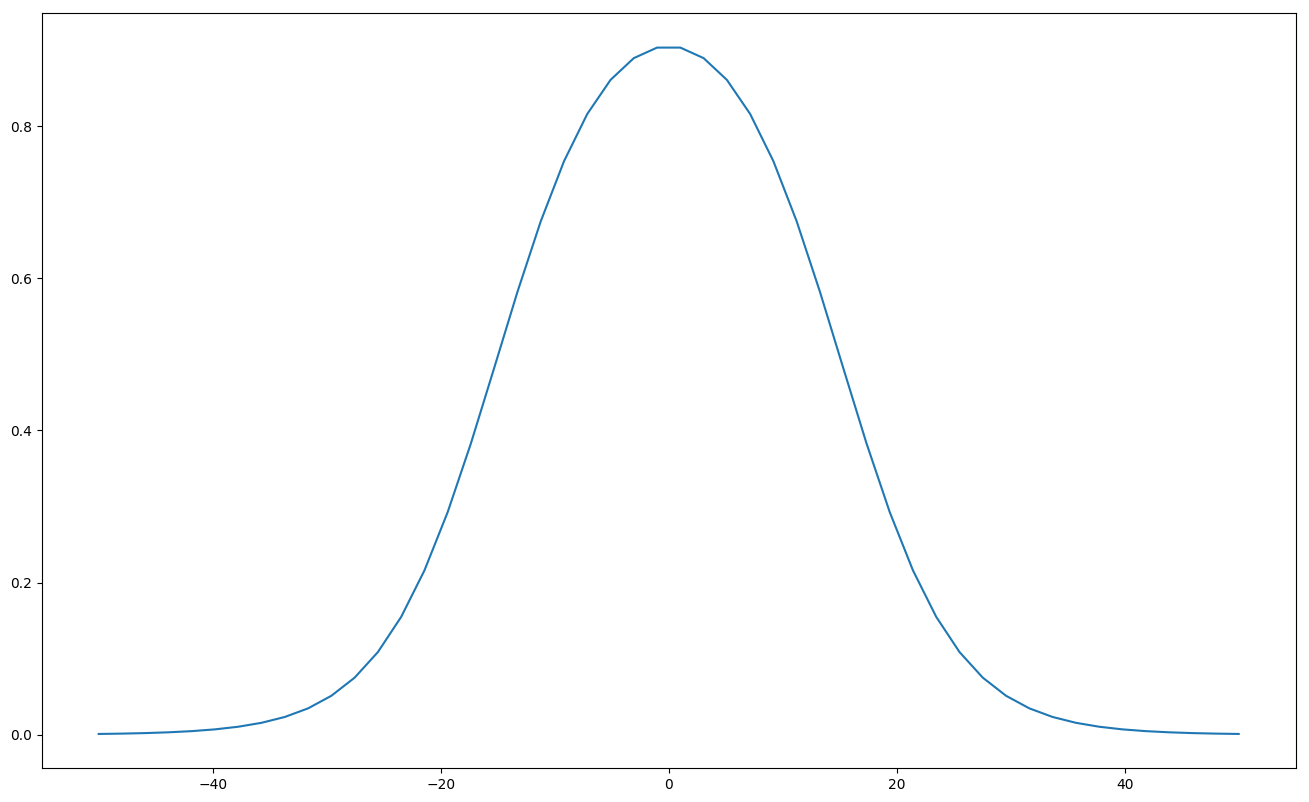

In [7]:
y = 0.5*((np.tanh(k_bin*(dz+memb_b)))+(np.tanh(k_bin*(memb_b-dz))))
plt.plot(dz, y)

# S_cytoplasmic

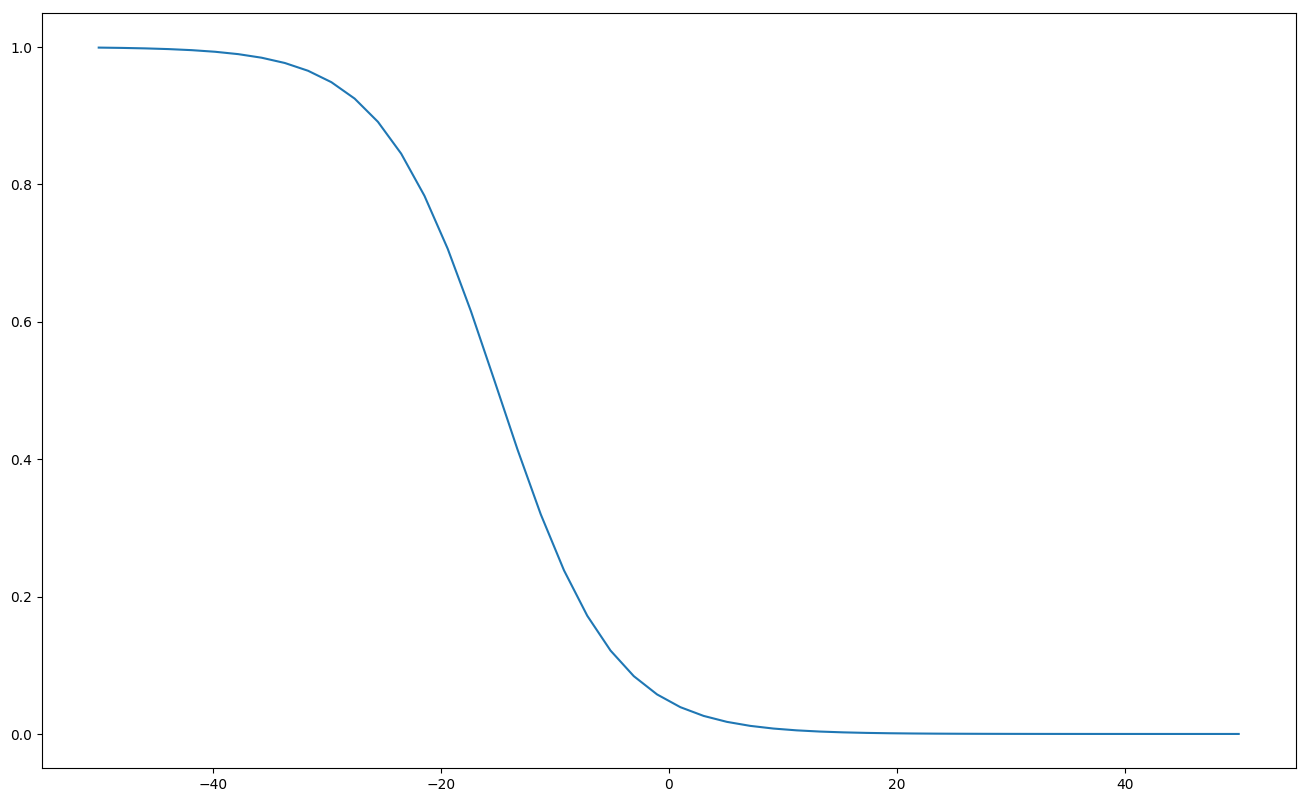

In [8]:
y = 0.5*(1+np.tanh(k_bin*(-memb_b-dz)))
plt.plot(dz, y)

# S_pore

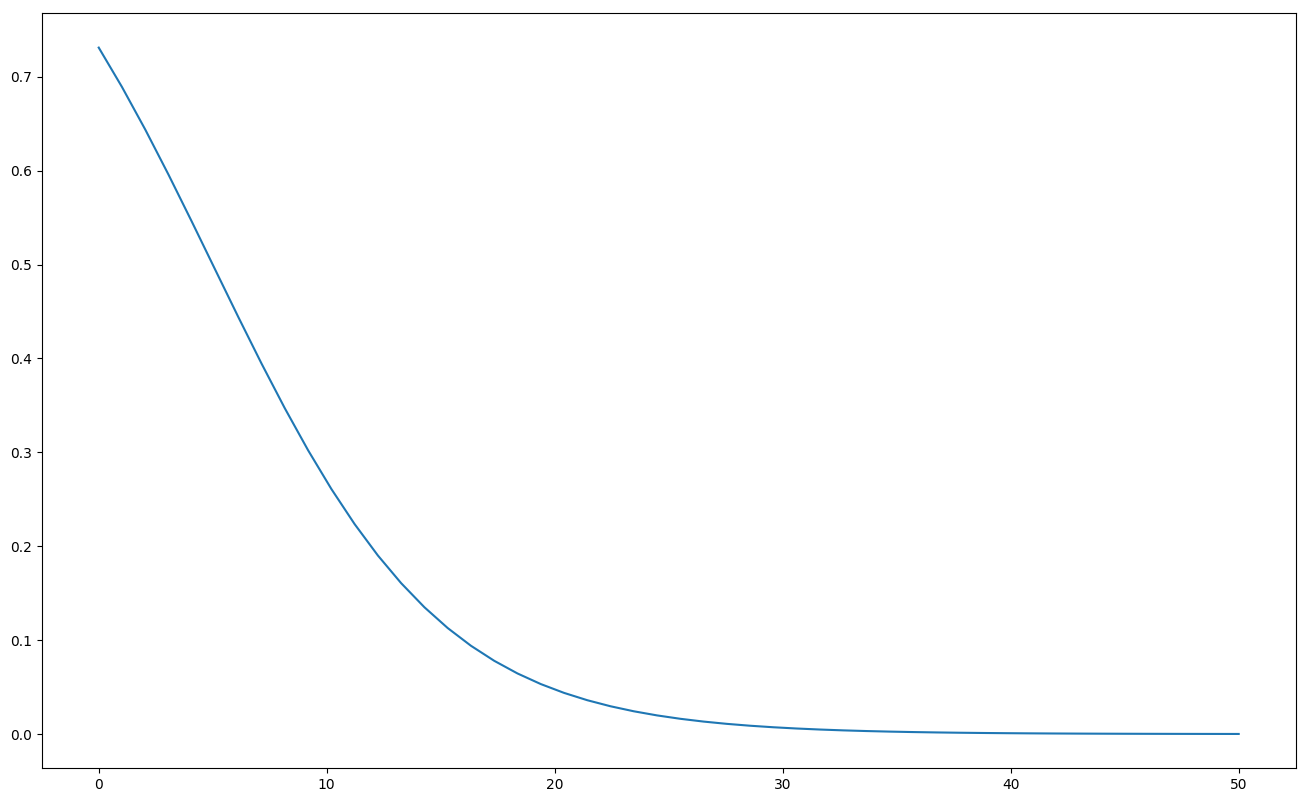

In [14]:
rho_actual = np.linspace(0,50)
rho0 = 5
y = 0.5*(1-(np.tanh(k_bin*(rho_actual-rho0))))
plt.plot(rho_actual, y)

# I can achieve the residue type dependency by add a z_res[i] to original V for z_res[i]=1, consider the sign.

In [ ]:
V= - s_per - s_cyt + s_mem*s_nopor - s_mem*s_por



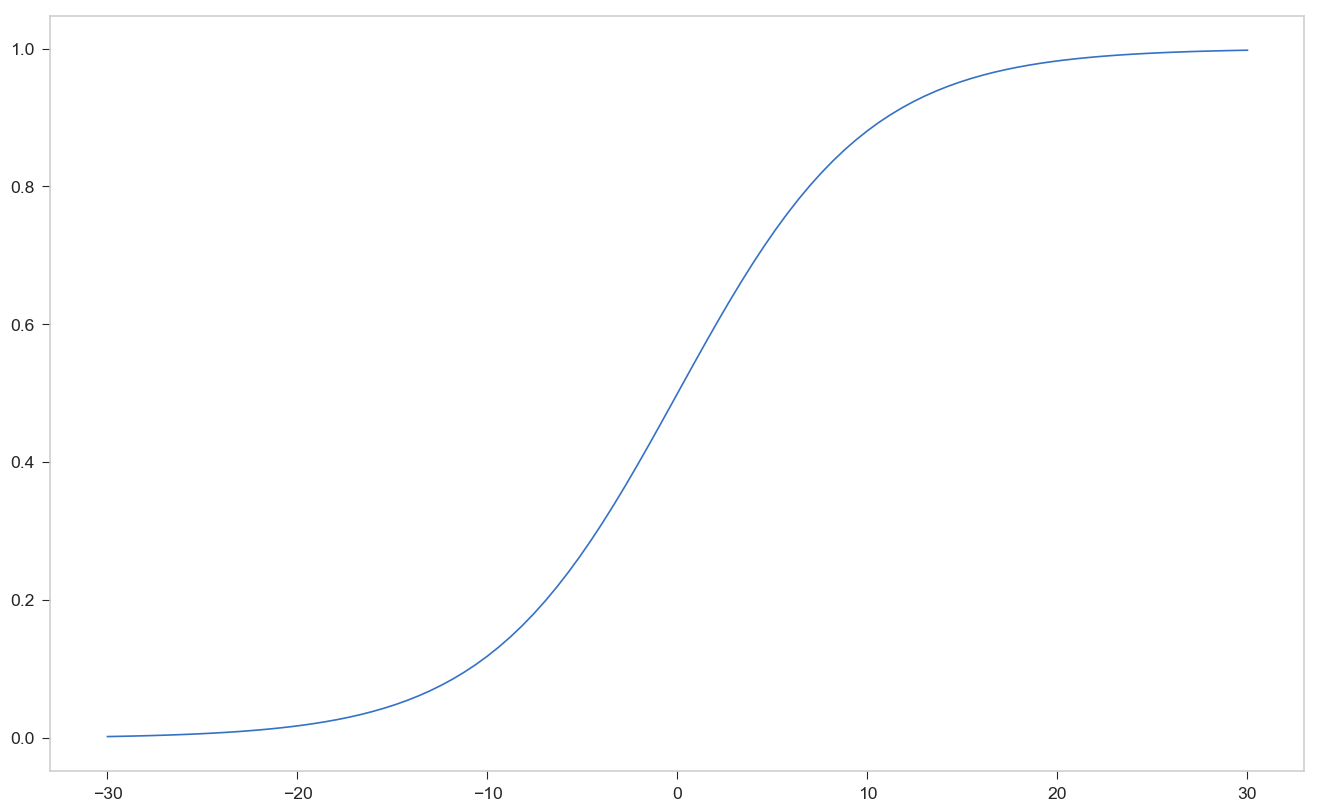

In [21]:
k_bin = 0.1
r = np.linspace(-30, 30, 100)
memb = -0
y = 0.5*np.tanh(k_bin*(r-memb)) + 0.5
plt.plot(r, y)


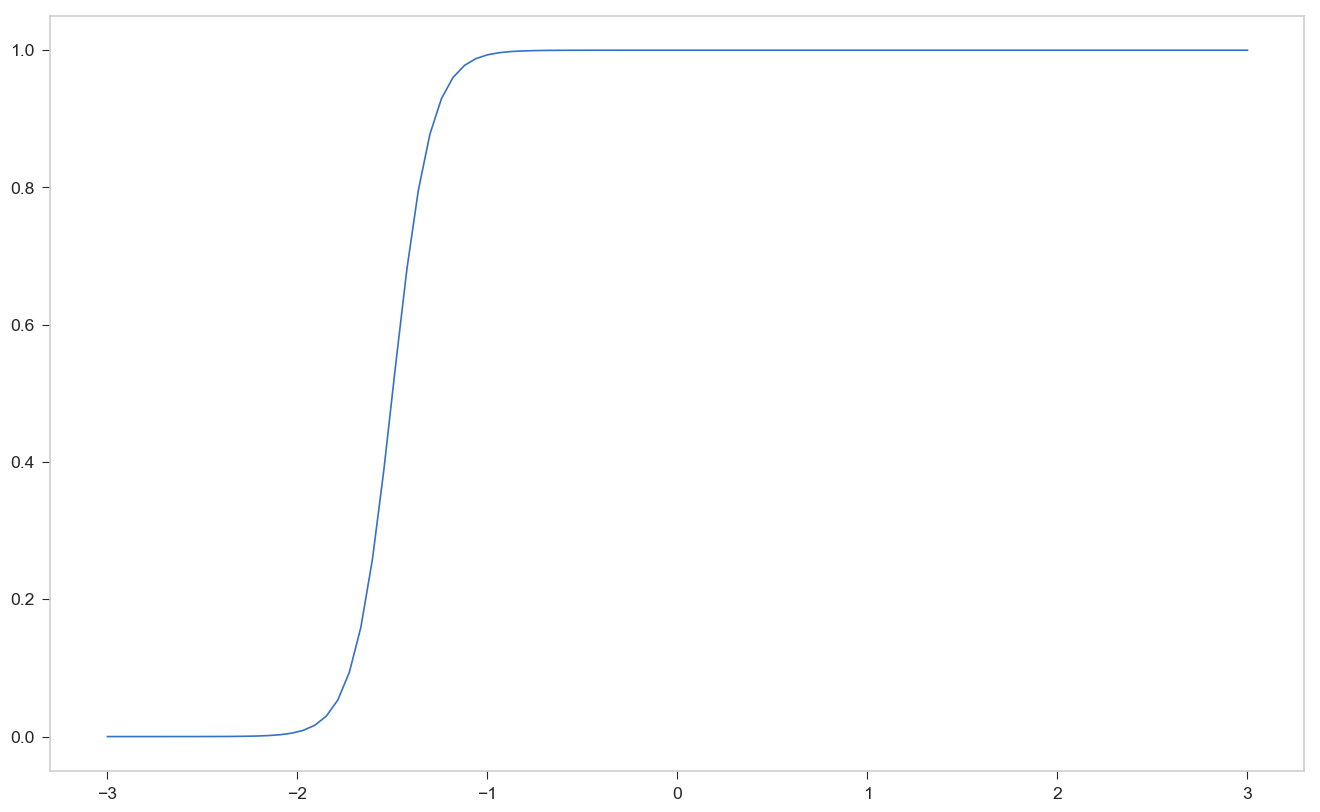

In [48]:
k_bin = 5
r = np.linspace(-3, 3, 100)
memb = 1.5
y1 = 0.5*np.tanh(k_bin*(r+memb))
y2 = 0.5*np.tanh(k_bin*(memb-r))
y =  1 * y1 + 0 * y2 + 0.5
plt.plot(r, y)


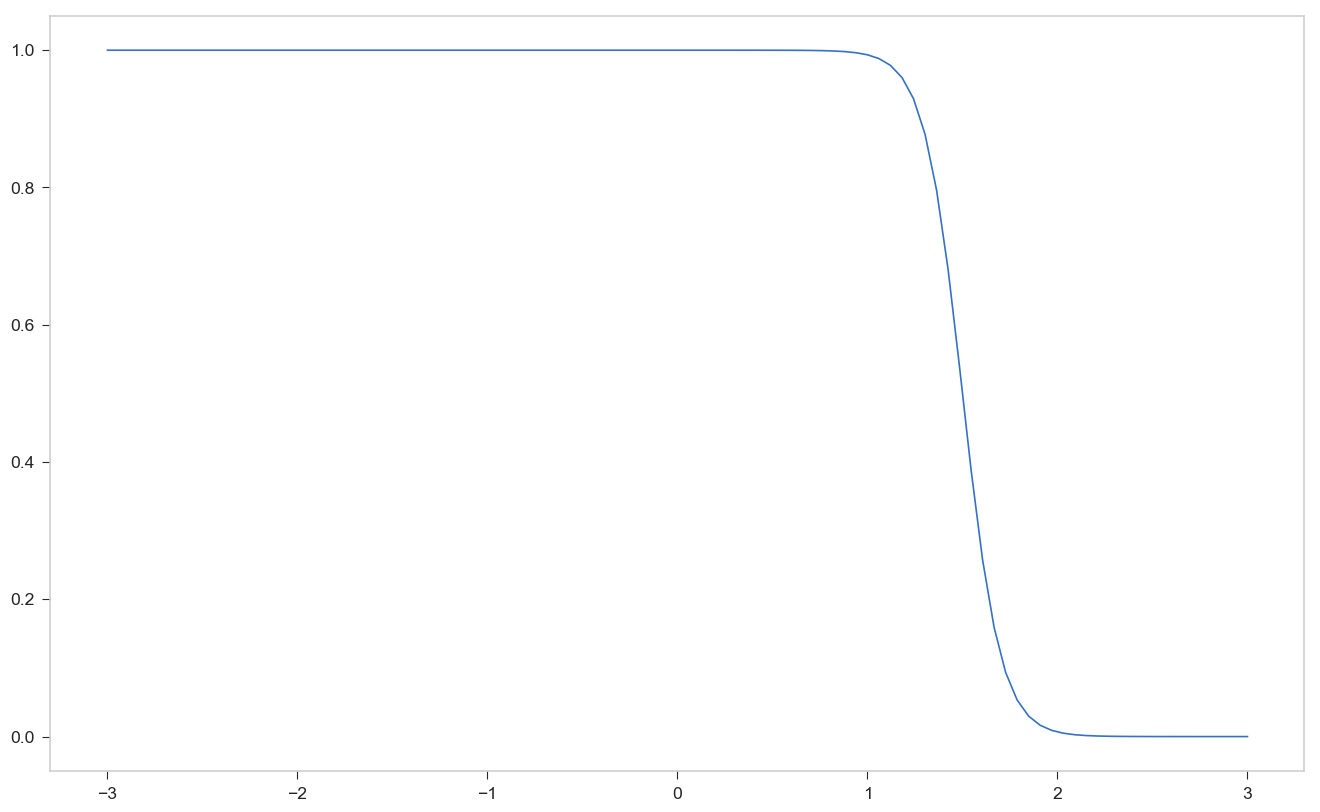

In [49]:
k_bin = 5
r = np.linspace(-3, 3, 100)
memb = 1.5
y1 = 0.5*np.tanh(k_bin*(r+memb))
y2 = 0.5*np.tanh(k_bin*(memb-r))
y =  0 * y1 + y2 + 0.5
plt.plot(r, y)


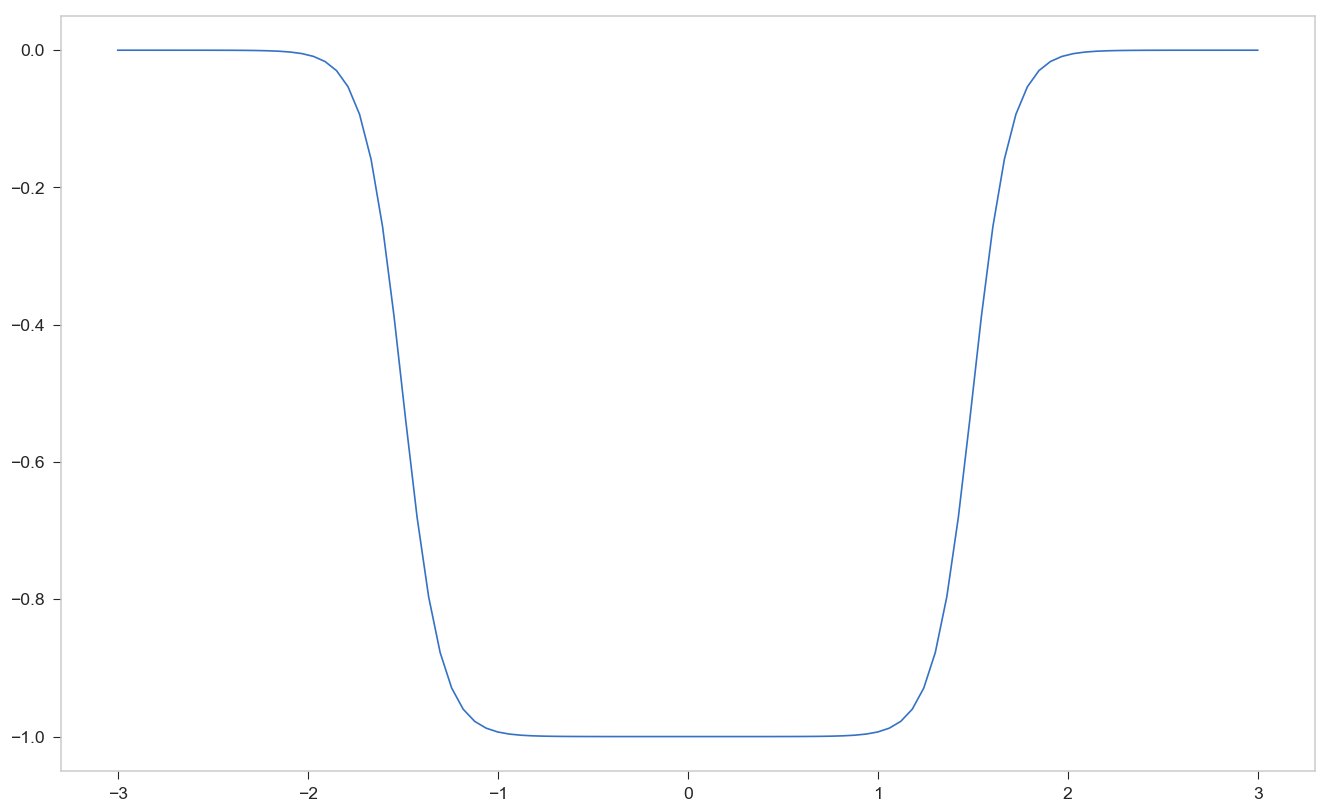

In [52]:
k_bin = 5
r = np.linspace(-3, 3, 100)
memb = 1.5
y1 = 0.5*np.tanh(k_bin*(r+memb))
y2 = 0.5*np.tanh(k_bin*(memb-r))
y = -y1 - y2
plt.plot(r, y)


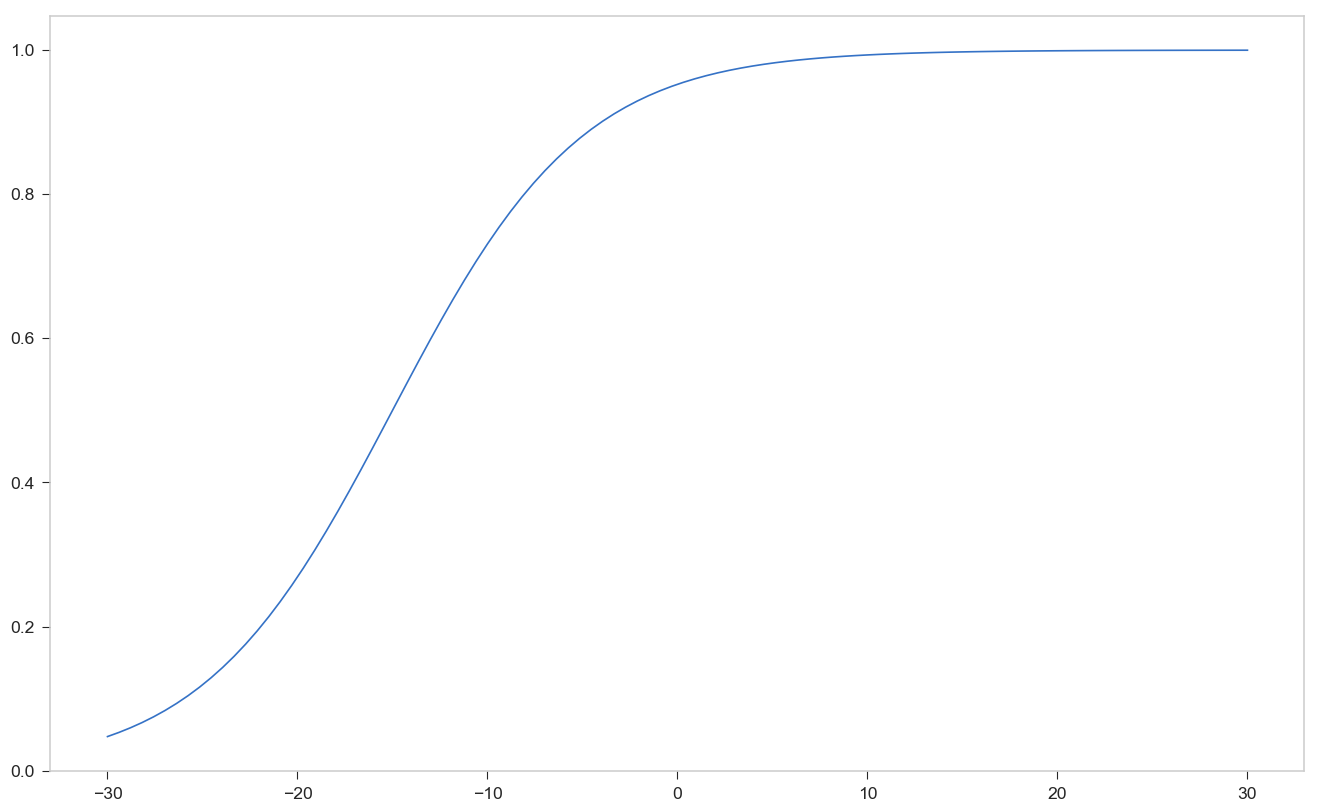

In [26]:
k_bin = 0.1
r = np.linspace(-30, 30, 100)
memb = -15
y1 = 0.5*np.tanh(k_bin*(r-memb))
memb = 15
y2 = -0.5*np.tanh(k_bin*(r-memb))
y = y1 + 0 * y2 + 0.5
plt.plot(r, y)


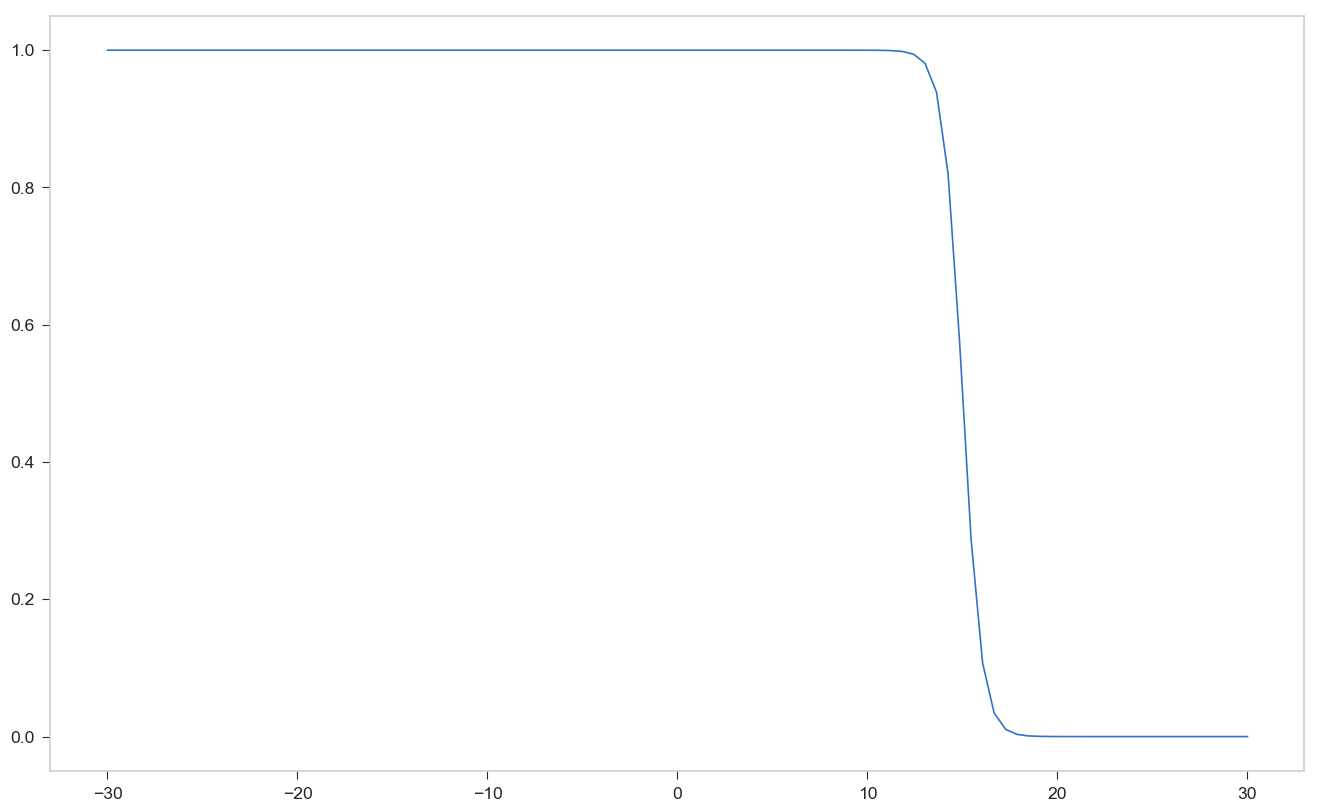

In [30]:
k_bin = 1
r = np.linspace(-30, 30, 100)

y1 = 0.5*np.tanh(k_bin*(r+memb))
memb = 15
y2 = -0.5*np.tanh(k_bin*(r-memb))
y = 0 * y1 + 1 * y2 + 0.5
plt.plot(r, y)